# Convolutional Neural Networks

Aim: <br>

To implement a convolutional neural network on the MNIST dataset and classify the digits from 0 to 9.

Model Explanation: <br>

Here, we use the ’keras’ library to implement the forward and backward passes of the given
convolutional neural network. First, we load, reshape and normalize the image data. Next,
we build a model using 3 Conv2D layers, each of size (3 × 3) with 32, 64, and 64 kernels
respectively. After the 3 Con2D layers, we use the MaxPooling2D layer of size (2 × 2)
followed by a flatten layer to input into the fully connected layers. Once the input has been
flattened after the 3 Conv2D and 1 MaxPooling2D layer, we pass it through 3 ’Dense’ layers in
keras, which correspond to the 2 fully connected layers of size 7744 and 128 neurons
respectively and one softmax layer having 10 neurons, with each neuron corresponding to
one class label (here digit) in MNIST. Thus, we get our model summary as given below:

In [ ]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

def train_mnist_conv():

    model = tf.keras.models.Sequential([

            tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
            tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
            tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(7744, activation = tf.nn.relu),
            tf.keras.layers.Dense(128, activation = tf.nn.relu),
            tf.keras.layers.Dense(10, activation = tf.nn.softmax)  ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model
  
model = train_mnist_conv()
print(model.summary())

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 7744)              59977280  
_________________________________________________________

In [ ]:
print(training_images.shape)

(60000, 28, 28, 1)


Further, we compile the model using the ’Adam’ optimizer and the loss function as 'sparse_categorical_crossentropy', which produces a category index of the most likely
matching category as compared to the one-hot array containing the probable match for each
category produced by the 'categorical_crossentropy'
loss. Additionally, we include both the
loss and accuracy metrics for the training and testing data.


Next, we train our model with training images, training labels and evaluate against our
testing images and testing labels after each epoch. The dataset has been split into 60,000
training images along with its corresponding labels, and 10,000 testing images along with its
corresponding labels. In the Colab notebook, the training set is given by training images,
training labels, and the testing set is given by test images, test labels. We run the model for
about 5 epochs and get an accuracy of 0.9951 on the training data, and an accuracy of 0.9885
on the test data as shown below:

In [ ]:
# model fitting
history = model.fit( training_images, training_labels, epochs = 5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 98s 37ms/step - loss: 0.2098 - accuracy: 0.9330 - val_loss: 0.0452 - val_accuracy: 0.9876
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0406 - accuracy: 0.9880 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.0378 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0400 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0517 - val_accuracy: 0.9888


We can also fit the model for higher epochs and measure the accuracy of the training and
testing set after each epoch in a similar manner, but we take 5 epochs here for faster training.
Now that the model has been trained, we can evaluate the model against the test set and plot
the training loss and accuracy for both the test and train data.

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

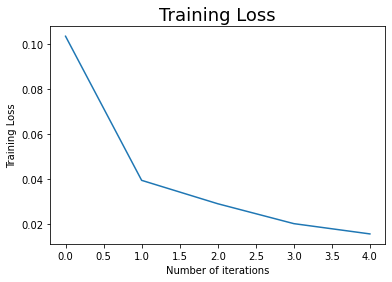

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in the training loss
plt.plot(train_loss) 
plt.title("Training Loss",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Training Loss") 
plt.show() 

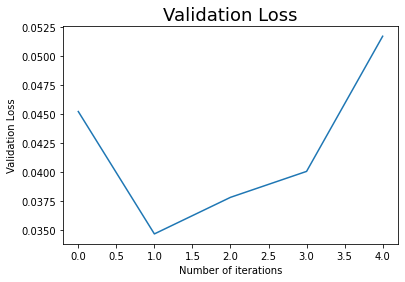

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in the validation loss
plt.plot(val_loss) 
plt.title("Validation Loss",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Validation Loss") 
plt.show() 

Here, we see both the training and testing (validation) error generally decreases after each
epoch. For the training loss, the error curve decreases smoothly, while for the validation loss,
the error curve might go up due to overfitting on the training data for a given epoch, but
generally decreases over the entire training period of 5 epochs.

Similarly, the accuracy plots for both the train and test data are:

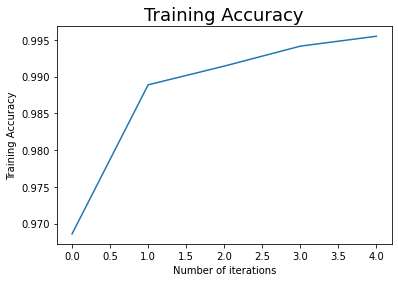

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in the validation loss
plt.plot(train_acc) 
plt.title("Training Accuracy",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Training Accuracy") 
plt.show() 

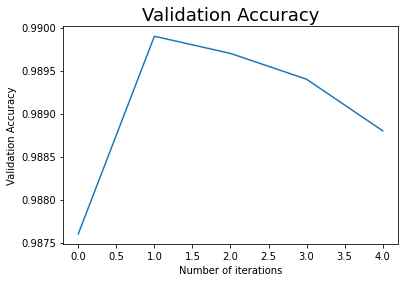

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in the validation loss
plt.plot(val_acc) 
plt.title("Validation Accuracy",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Validation Accuracy") 
plt.show() 

Here, we see that the accuracy for both the training and testing (validation) data generally
increases after each epoch. For the training accuracy, the curve increases smoothly, while for
the validation accuracy, the curve might go down due to overfitting on the training data for a
given epoch, but generally increases over the entire training period of 5 epochs.


Now, we also evaluate our model against the test data as given by the figure below.
Additionally, we plot a total of 18 images, 9 of which were correctly classified by our model
and 9 of which were incorrectly classified by our model to compare the true output and the
predicted output.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9888  classified correctly
112  classified incorrectly


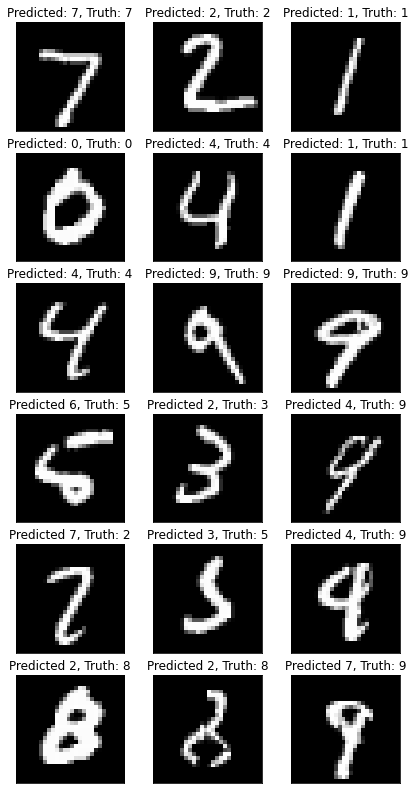

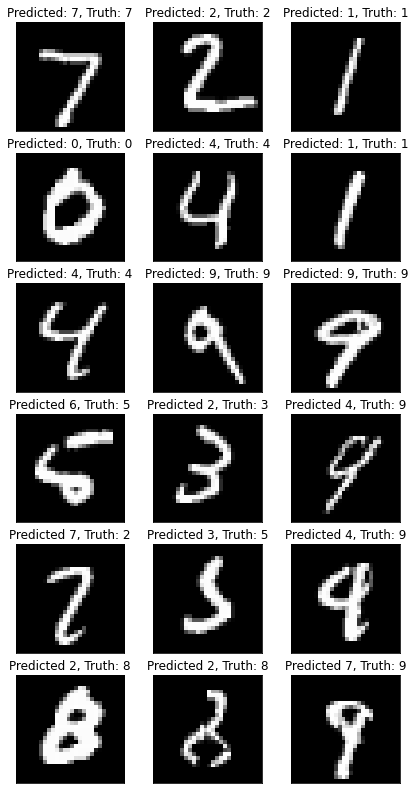

In [ ]:
# Predict classes based on the test set
pred_label = model.predict_classes(test_images)

# see which we predicted correctly and which not
correct_pred = np.nonzero(pred_label == test_labels)[0]
incorrect_pred = np.nonzero(pred_label != test_labels)[0]
print(len(correct_pred)," classified correctly")
print(len(incorrect_pred)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
figure_evaluation = plt.figure(figsize=(7,14))

# plotting 9 correct predictions
for i, correct in enumerate(correct_pred[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Predicted: {}, Truth: {}".format(pred_label[correct],  test_labels[correct]))
    plt.xticks([])
    plt.yticks([])

# plotting 9 incorrect predictions
for i, incorrect in enumerate(incorrect_pred[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Predicted {}, Truth: {}".format(pred_label[incorrect], test_labels[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

Here, we see that out of the 10,000 images in the test data, our model classifies 9885 images
correctly, thus verifying the accuracy of the test data. Note that the accuracy of the model can
be increased by running for higher epochs but here we limit the training to 5 epochs for faster
training process.
